## 결정 함수(decision function)를 이용하여 불확실성 추정

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from sklearn.datasets import make_circles

In [5]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=0)

In [10]:
import numpy as np
y_named = np.array(["blue", "red"])[y]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
        train_test_split(X, y_named, y, random_state=0)

In [16]:
GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [18]:
GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named).decision_function(X_test)

array([-1.84454647,  4.79276718, -4.46365022, -4.46365022,  4.86060642,
       -4.26007857, -5.53240559,  4.44280467, -1.40571578,  4.79276718,
       -0.35673277, -4.11994336,  4.86060642, -3.68180923,  4.86060642,
        4.79276718, -6.35564799, -5.92414726,  2.67051862,  4.79276718,
       -3.30431728,  3.96888163,  4.79276718,  3.55688991, -3.613591  ])

In [20]:
GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named).decision_function(X_test).shape
# 25개의 값들에 대한 불확실성의 추정 정도를 실수값으로 나타낸다.

(25,)

In [21]:
GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named).decision_function(X_test)>0

array([False,  True, False, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True, False])

In [22]:
GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named).predict(X_test)

array(['blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red',
       'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue',
       'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue'],
      dtype='<U4')

In [27]:
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)
print("결정 함수: \n{}".format(gbrt.decision_function(X_test)[:6]))
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred는 예측 결과와 같다: {}".format(np.all(pred == gbrt.predict(X_test))))
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수: 
[-1.84454647  4.79276718 -4.46365022 -4.46365022  4.86060642 -4.26007857]
임계치와 결정 함수 결과 비교:
[False  True False False  True False False  True False  True False False
  True False  True  True False False  True  True False  True  True  True
 False]
예측:
['blue' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'red' 'blue' 'red' 'blue'
 'blue' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red'
 'red' 'red' 'blue']
pred는 예측 결과와 같다: True
결정 함수 최솟값: -6.36 최댓값: 4.86


A Jupyter Widget

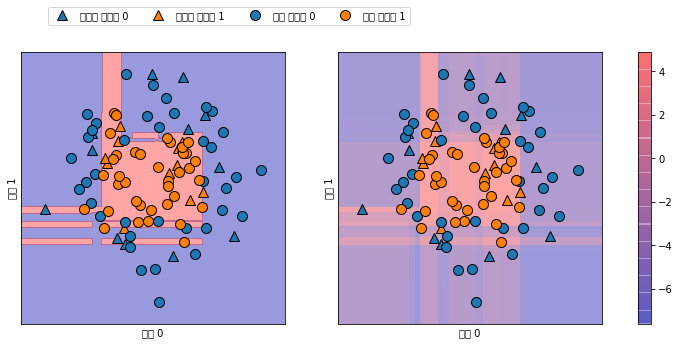

In [36]:
import matplotlib.pyplot as plt
import mglearn
from tqdm import tqdm_notebook
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4, cm=mglearn.ReBl)
for ax in tqdm_notebook(axes):
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0", "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show()